# MTH9855 Homework Five
## Likun Ouyang
### March 20, 2018 Spring

# 5.1
(a) Calculate the historical (regressed, no intercept) beta, for each of these
assets as of Dec 31, 2014. In each case, calculate the appropriate t-statistic
on the coefficient to test the null hypothesis $\beta$ = 0 and state whether you
reject the null hypothesis.

## Ans:
All betas for 3 assets are significant to reject the null hypothesis $\beta$ = 0 regarding t-statistic
$$\beta_{IBM}=0.907$$
$$\beta_{AAPL}=1.136$$
$$\beta_{TSLA}=1.310$$

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

C:\Users\Carter\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv("BetaExample.txt",sep="|")
data["DATE"] = pd.to_datetime(data["DATE"])

In [3]:
data_a = data[data["DATE"]<="2014-12-31"]

In [4]:
IBM = data_a[data_a.TICKER == "IBM"]
AAPL = data_a[data_a.TICKER == "AAPL"]
TSLA = data_a[data_a.TICKER == "TSLA"]
#drop those NaN rows
TSLA = TSLA[-TSLA.R.isnull()]

In [5]:
IMB_fitted = sm.OLS(IBM.R.values.reshape(-1, 1),IBM.RM.values.reshape(-1, 1)).fit()
IMB_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     3133.
Date:                Tue, 20 Mar 2018   Prob (F-statistic):               0.00
Time:                        14:39:34   Log-Likelihood:                 17657.
No. Observations:                6301   AIC:                        -3.531e+04
Df Residuals:                    6300   BIC:                        -3.531e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9067      0.016     55.970      0.000       0.875       0.938
==============================================================================
Omnibus:                     1227.530   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34867.449
Skew:                           0.179   Prob(JB):                         0.00
Kurtosis:                      14.519   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
AAPL_fitted = sm.OLS(AAPL.R.values.reshape(-1, 1),AAPL.RM.values.reshape(-1, 1)).fit()
AAPL_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     1500.
Date:                Tue, 20 Mar 2018   Prob (F-statistic):          1.61e-294
Time:                        14:39:34   Log-Likelihood:                 13915.
No. Observations:                6301   AIC:                        -2.783e+04
Df Residuals:                    6300   BIC:                        -2.782e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1363      0.029     38.728      0.000       1.079       1.194
==============================================================================
Omnibus:                     1964.903   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           232261.428
Skew:                          -0.417   Prob(JB):                         0.00
Kurtosis:                      32.732   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
TSLA_fitted = sm.OLS(TSLA.R.values.reshape(-1, 1),TSLA.RM.values.reshape(-1, 1)).fit()
TSLA_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     157.4
Date:                Tue, 20 Mar 2018   Prob (F-statistic):           6.51e-34
Time:                        14:39:34   Log-Likelihood:                 2219.2
No. Observations:                1135   AIC:                            -4436.
Df Residuals:                    1134   BIC:                            -4431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3101      0.104     12.548      0.000       1.105       1.515
==============================================================================
Omnibus:                      262.175   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2947.095
Skew:                           0.726   Prob(JB):                         0.00
Kurtosis:                      10.760   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Compute the holdings vector $h$ ∈ $\mathbb{R}^3$
for the unique portfolio which is dollarneutral
(ie. self-financing) and which has unit exposure to AAPL and zero
exposure to beta as of Dec 31, 2014.

## Ans:

We have the following equation to solve in order to compute the holding vector that satisfy all conditions.

$$ h_1+h_2+h_3=0$$
$$ h_2=1$$
$$0.907h_1+1.136h_2+1.310h_3 = 0$$

The solution is $ h  = [-0.432,  1        , -0.568]$, which means we sell 0.432 dollar IBM, sell 0.568 dollar TSLA, buy 1 dollar  AAPL

In [8]:
A = np.array([[1,1,1],[0,1,0],[0.907,1.136,1.31]])
b = np.array([0,1,0])
h=np.linalg.solve(A,b)
tickers=data['TICKER'].unique()
for a,holdings in zip(tickers,h):
    print(a,':',holdings)

IBM : -0.4317617866
AAPL : 1.0
TSLA : -0.5682382134


(c) Compute the daily returns of the portfolio from (b) over the period Jan 1,
2015 to Dec 31, 2015. Assume that each day, the portfolio is rebalanced
back to the initial holdings vector h ∈ $\mathbb{R}^3$. Plot the cumulative sum of the
log returns.

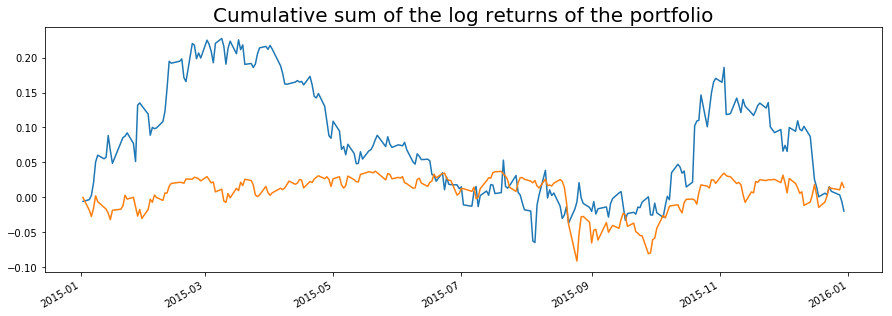

In [9]:
start_date = "2015-01-01"
end_date = "2015-12-31"
mask = (data['DATE'] > start_date) & (data['DATE'] <= end_date)
data_c = data[mask]
IBM_C = data_c[data_c.TICKER=='IBM'].R.values.reshape(-1,1)
AAPL_C = data_c[data_c.TICKER=='AAPL'].R.values.reshape(-1,1)
TSLA_C = data_c[data_c.TICKER=='TSLA'].R.values.reshape(-1,1)
R = np.concatenate((IBM_C,AAPL_C,TSLA_C), axis=1)
daily_return = np.dot(R,h)
market_return = data_c[data_c.TICKER=='TSLA'].RM.values.reshape(-1,1).flatten()
fig, ax = plt.subplots(figsize=(15,5))
fig.autofmt_xdate()
plt.plot(data_c[data_c.TICKER=='IBM'].DATE,np.cumsum(daily_return),data_c[data_c.TICKER=='IBM'].DATE,np.cumsum(market_return))
plt.title("Cumulative sum of the log returns of the portfolio",fontsize=20)
plt.show()

(d) Compute the realized correlation of the returns in part (c) to the market’s
return. Construct a statistical test of the null hypothesis that the correlation
is zero. Is the realized correlation significantly different from zero at
the 95% level?

## Ans:
The realized correlation of the returns in part (c) to the market return is 0.0245.

Its statistical test's p-value is 0.699, which is not significantly different from zero at 95% level.

In [10]:
from scipy.stats.stats import pearsonr
pearsonr(market_return,daily_return)

(0.029277171987615556, 0.64435287983432687)

# 5.2
(a) Calculate $\mathbb{E}[h'r]$ and $\mathbb{V}[h'r]$. Note that $\mathbb{V}[h'r]$ can be expressed as $\mathbb{V}[h'r] = f(\beta, \sigma^2
_M) + g(\sigma^2_1, . . . , \sigma^2_n)$; find functions f() and g() explicitly.

## Ans:

$$\mathbb{E}[h'r] = \sum{\frac1n\mathbb{E}[r_i}] = \sum{\frac1n(\beta\mathbb{E}[r_M]+\mathbb{E}[\epsilon_i])} = \beta \mathbb{E}[r_M] + \frac1n \sum{\mathbb{E}[\epsilon_i]}$$

$$\mathbb{V}[h'r] = \mathbb{V}[\beta r_M + \frac1n\sum{\epsilon_i}] = \beta^2 \sigma^2_M + \frac1{n^2} \sum{\sigma_i^2} $$
 
where
$$f(\beta,\sigma_M^2)=\beta^2\sigma_M^2
$$
$$
g(\sigma_1^2,...,\sigma_n^2)=\frac{1}{n^2}\sum_{i=1}^n {\sigma_i^2}
$$

(b) Take $\beta = 0.5$ and $\sigma_M = 0.2$. Assume that each constituent fund has an
annualized volatility target of 10% and all $\sigma_i \approx 0.03$. The “fraction of
variance explained by the market” for the fund-of-funds is defined to be f /(f + g). Numerically compute and plot this fraction as a function of n
for n = 2 . . . 30.

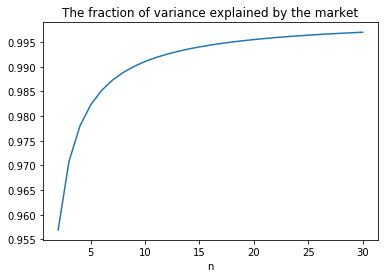

In [11]:
#(b) Numerically compute and plot the“fraction of variance explained by the market” for the fund-of-funds f/(f+g)
beta = 0.5
sigma_m = 0.2
sigma_i = 0.03
f = beta**2*sigma_m**2
n = np.arange(2,31)
g = sigma_i**2/n
plt.plot(n,f/(f+g))
plt.title("The fraction of variance explained by the market")
plt.xlabel("n")
plt.show()

(c) Take the same assumptions as (b). Further assume that each $\epsilon_i$ has a
Sharpe ratio of 1.5, so that $\mathbb{E}[\epsilon_i] = 1.5\sigma_i$, and the market’s expected annual
return is $\mathbb{E}[r_M] = 0.07$. The fund-of-funds charges a fee of 0.01 on capital.
Numerically compute and plot the Sharpe ratio, $\mathbb{E}[h'r − 0.01]/\sqrt{\mathbb{V}[h'r]}$ as
a function of n for n = 2 . . . 30. How does this change if the Sharpe ratio
of $\epsilon_i$
is 2.0 rather than 1.5?

## Ans:
If the Sharpe ratio
of $\epsilon_i$
is 2.0 rather than 1.5, the Sharpe ratio of the whole portfolio increase as the figure below.


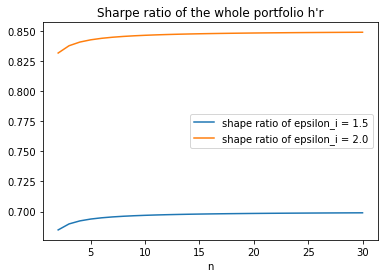

In [12]:
#(c) Numerically compute and plot the Sharpe ratio
E_i = 1.5* sigma_i
E_m = 0.07
E_portfolio = beta*E_m + E_i
plt.title("Sharpe ratio of the whole portfolio h'r")
plt.xlabel("n")
plt.plot(n,(E_portfolio-0.01)/np.sqrt(f+g),label="shape ratio of epsilon_i = 1.5")
E_i = 2.0* sigma_i
E_portfolio = beta*E_m + E_i
plt.plot(n,(E_portfolio-0.01)/np.sqrt(f+g),label="shape ratio of epsilon_i = 2.0")
leg = plt.legend(loc='best')
plt.show()

(d) If the fund-of-funds could simply invest in a single fund with the same
properties as the others except that this fund has $\beta = 0$ and $\sigma_i = 0.1$,
would that be better or worse, in terms of Sharpe ratio, than the above
scenario?

## Ans:
It would be better in terms of Sharpe ratio than the above secnario.

Given the same assumption as above, we have $\mathbb{E}[\epsilon_i] = 1.5\sigma_i$ and $\sigma_i = 0.1$. 

Then the whole Sharpe ratio is $$\mathbb{E}[h'r − 0.01]/\sqrt{\mathbb{V}[h'r]} = (\mathbb{E}[\epsilon_i] - 0.01)/\sigma_i) = 1.5 -\frac{1}{100\sigma_i} \approx 1.4 > 0.7$$
so It would be better in terms of Sharpe ratio to invest in a single fund with $\beta = 0$.